## Assignment 2.1 - Represenatation Learning
    Submitted by: 
    Amandeep Kaur (21044104)                                                                                   
    Bhupesh Dod (21046099)

## Import the Libraries

In [4]:
import numpy as nm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats
import time

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

Import all the necessary Libraries.

## Import the Data

In [5]:
abalone_data = pd.read_csv("/Users/amandeepkaur/Desktop/ECE657A/Assignments /Assignment 2/ece657a-W23-asg2-datasets-jupyterdemo/abalone.csv",
names= ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight','Shell_weight', 'Rings'])


wine_data1 = pd.read_csv("/Users/amandeepkaur/Desktop/ECE657A/Assignments /Assignment 2/ece657a-W23-asg2-datasets-jupyterdemo/winequality-red.csv",sep = ";")
wine_data1["colour"]=1
wine_data1 = wine_data1[list(('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'colour', 'quality'))]

wine_data2 = pd.read_csv("/Users/amandeepkaur/Desktop/ECE657A/Assignments /Assignment 2/ece657a-W23-asg2-datasets-jupyterdemo/winequality-white.csv",sep = ";")
wine_data2["colour"]=0
wine_data2 = wine_data2[list(('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'colour', 'quality'))]

wine_data = pd.concat([wine_data1, wine_data2])
wine_data = wine_data.reset_index()

Import all the datasets and combine the wine datasets into a single dataset.

## Abalone Data

Split the data into training and test sets and apply standardization

In [6]:
#Diving the data into test and training sets
X_abalone = abalone_data.iloc[:, 1:-1]
y_abalone = abalone_data.iloc[:, -1]
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_abalone, y_abalone, random_state= 45)
sc = StandardScaler()
X_a_train.iloc[:, :] = sc.fit_transform(X_a_train.iloc[:, :])
X_a_test.iloc[:, :] = sc.transform(X_a_test.iloc[:, :])

### KNN on abalone raw

In [7]:
#knn using best k from assignment 1
classifier = KNeighborsClassifier(n_neighbors = 73, weights='uniform', p=1)
classifier.fit(X_a_train, y_a_train)
#Predict the model
y_a_pred = classifier.predict(X_a_test)
accuracy_score(y_a_test, y_a_pred)
print("Accuracy of Abalone Raw at k=73 is: " + str(accuracy_score(y_a_test, y_a_pred)*100)+"%")

Accuracy of Abalone Raw at k=73 is: 28.325358851674643%


For k=73 and distance as the weights, the maximum accuracy of KNN at abalone raw is 28.32% 

### Apply PCA on Abalone

In [8]:
#Diving the data into test and treaining sets
X_a_train_pca, X_a_test_pca, y_a_train_pca, y_a_test_pca = train_test_split(X_abalone, y_abalone, random_state= 45)
X_a_train_pca.iloc[:, :] = sc.fit_transform(X_a_train_pca.iloc[:, :])
X_a_test_pca.iloc[:, :] = sc.transform(X_a_test_pca.iloc[:, :])
X1_pca = X_a_train_pca
X2_pca = X_a_test_pca
pca = PCA(n_components=None)
X_a_train_pca = pca.fit_transform(X_a_train_pca)
X_a_test_pca = pca.transform(X_a_test_pca)
#Converting the object to dataframe
abalone_pca = pd.DataFrame(data = X_a_train_pca)
print("95% Variance is explained at " + str(pca.n_components_ - 4) + " Components")

95% Variance is explained at 3 Components


### Plot for First two components of PCA Abalone with hues on Output Variable

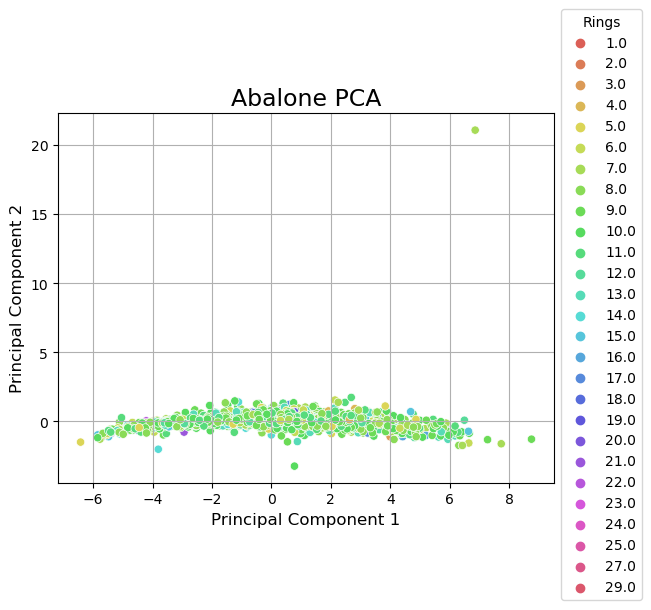

In [9]:
sns.scatterplot(abalone_pca[0], abalone_pca[1], hue = y_a_train_pca, palette= sns.color_palette("hls", 27))
plt.xlabel("Principal Component 1", fontsize = 12)
plt.ylabel("Principal Component 2", fontsize = 12)
plt.title("Abalone PCA", fontsize = 17)
plt.legend(title = "Rings" ,loc = 2, bbox_to_anchor = (1,1.30))
plt.grid()
plt.show()

The plot shows two PCA components of Abalone after performing PCA Dimensionality Reduction and using the colors as the Rings variable to distinguish between different datapoints.

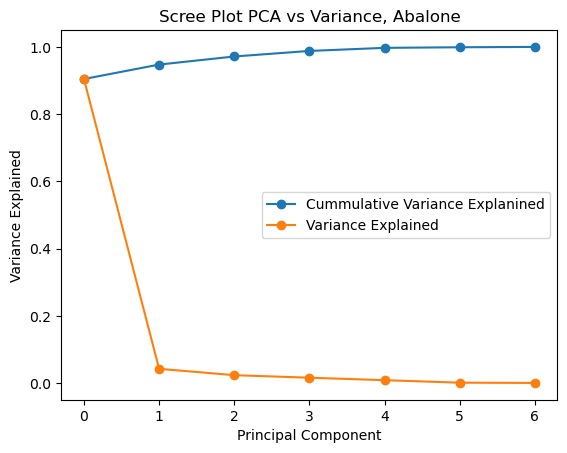

In [11]:
#Scree Plot
evr_abalone = nm.round(pca.explained_variance_ratio_,6)
cvr_abalone = nm.cumsum(pca.explained_variance_ratio_)
n_values = range(0, X_a_train_pca.shape[1])

pca_df_abalone = pd.DataFrame()
pca_df_abalone['Cummulative Variance Ratio'] = cvr_abalone
pca_df_abalone['Explained Variance Ratio'] = evr_abalone

plt.plot(n_values, pca_df_abalone,'o-')
plt.legend(['Cummulative Variance Explanined', 'Variance Explained'])
plt.title('Scree Plot PCA vs Variance, Abalone')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The Scree Plot shows the variance represented by the PCA eigenvectors. 95% of the variance is explained by 3 PCA components.

### KNN on Abalone PCA

In [12]:
number = (1,2,3,4,5,6,7)

columns = {
  "Accuracy": [],
  "PCA Components": []
}

#load data into a DataFrame object:
matrix = pd.DataFrame(columns)


for i in number:
    pca2 = PCA(n_components=i)
    X_a_train_pca = pca2.fit_transform(X_a_train_pca)
    X_a_test_pca = pca2.transform(X_a_test_pca)
    classifier = KNeighborsClassifier(n_neighbors = 73, weights='uniform', p=1)
    classifier.fit(X_a_train_pca, y_a_train_pca)
    y_a_pred_pca = classifier.predict(X_a_test_pca)
    matrix.loc[i-1] = [accuracy_score(y_a_test_pca, y_a_pred_pca), i]
    X_a_train_pca = X1_pca
    X_a_test_pca = X2_pca

Text(0, 0.5, 'Accuracy')

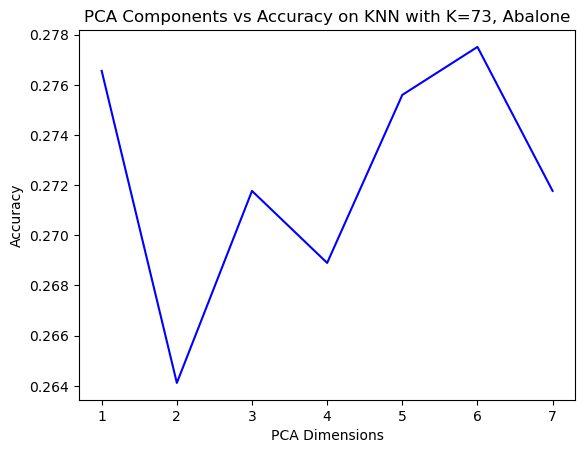

In [13]:
fig, ax = plt.subplots()
ax.plot( matrix['PCA Components'],matrix['Accuracy'], color='blue')
plt.title("PCA Components vs Accuracy on KNN with K=73, Abalone")
plt.xlabel('PCA Dimensions')
plt.ylabel('Accuracy')

In [14]:
print("Max Accuracy " + str(max(matrix['Accuracy']) *100))
print("Value of PCA at maximum accuracy : "+str(nm.argmax(matrix['Accuracy']) + 1))

Max Accuracy 27.751196172248804
Value of PCA at maximum accuracy : 6


The graph displays the Accuracy vs Number of PCA Dimensions. The Accuracy of KNN increases as the PCA components are increased however it decreased when the components were increased to 2 from 1. Overall, the best setting of KNN gives the best accuracy of 27.75% at 6 PCA components. It is just slightly up from 27.17% which is at 3 PCA components explaining the 95% of variance.

### Apply LDA on Abalone

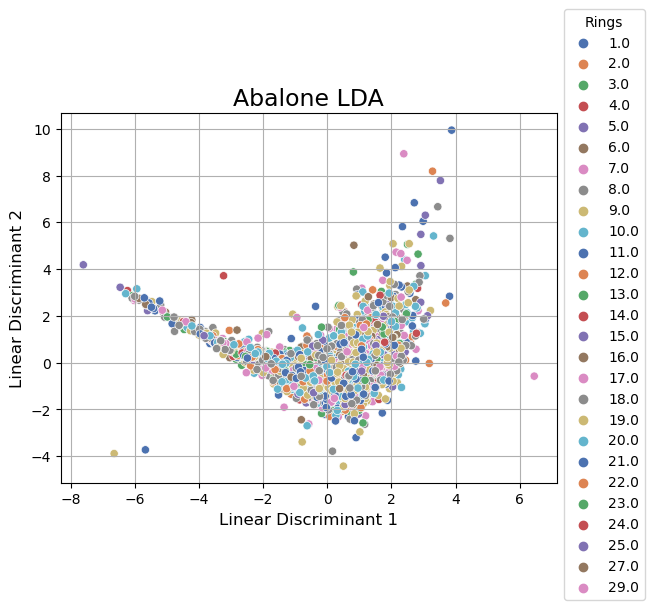

In [15]:
#Diving the data into test and treaining sets
X_a_train_lda, X_a_test_lda, y_a_train_lda, y_a_test_lda = train_test_split(X_abalone, y_abalone, random_state= 45)

sc = StandardScaler()
X_a_train_lda = sc.fit_transform(X_a_train_lda)
X_a_test_lda = sc.transform(X_a_test_lda)

X1_lda = X_a_train_lda
X2_lda = X_a_test_lda

lda = LDA(n_components=6)
X_a_train_lda = lda.fit_transform(X_a_train_lda, y_a_train_lda)
X_a_test_lda = lda.transform(X_a_test_lda)
abalone_lda = pd.DataFrame(data = X_a_train_lda)

#Plotting
sns.scatterplot(abalone_lda[0], abalone_lda[1], hue = y_a_train_lda, palette= sns.color_palette("deep", 27))
plt.xlabel("Linear Discriminant 1", fontsize = 12)
plt.ylabel("Linear Discriminant 2", fontsize = 12)
plt.title("Abalone LDA", fontsize = 17)
plt.legend(title = "Rings" ,loc = 2, bbox_to_anchor = (1,1.30))
plt.grid()
plt.show()

### KNN on Abalone LDA

In [16]:
number = (1,2,3,4,5,6,7)

columns = {
  "Accuracy": [],
  "LDA Components": []
}

#load data into a DataFrame object:
matrix = pd.DataFrame(columns)


for i in number:
    lda2 = LDA(n_components=i)
    X_a_train_lda = lda2.fit_transform(X_a_train_lda,y_a_train_lda)
    X_a_test_lda = lda2.transform(X_a_test_lda)
    classifier = KNeighborsClassifier(n_neighbors = 73, weights='uniform', p=1)
    classifier.fit(X_a_train_lda, y_a_train_lda)
    y_a_pred_lda = classifier.predict(X_a_test_lda)
    matrix.loc[i-1] = [accuracy_score(y_a_test_lda, y_a_pred_lda), i]
    X_a_train_lda = X1_lda
    X_a_test_lda = X2_lda

Text(0, 0.5, 'Accuracy')

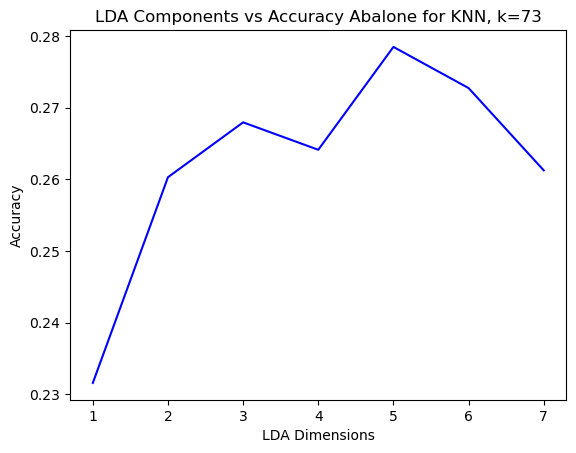

In [17]:
fig, ax = plt.subplots()
ax.plot( matrix['LDA Components'],matrix['Accuracy'], color='blue')
plt.title("LDA Components vs Accuracy Abalone for KNN, k=73")
plt.xlabel('LDA Dimensions')
plt.ylabel('Accuracy')

As the LDA Dimensions increase the accuracy increases except for Components = 4. However the best Accuracy for KNN with k =73 is at LDA = 5 components. At LDA = 5, accuracy =  27.84% which is just slightly better than PCA = 2 components.

### t-SNE on Abalone Data

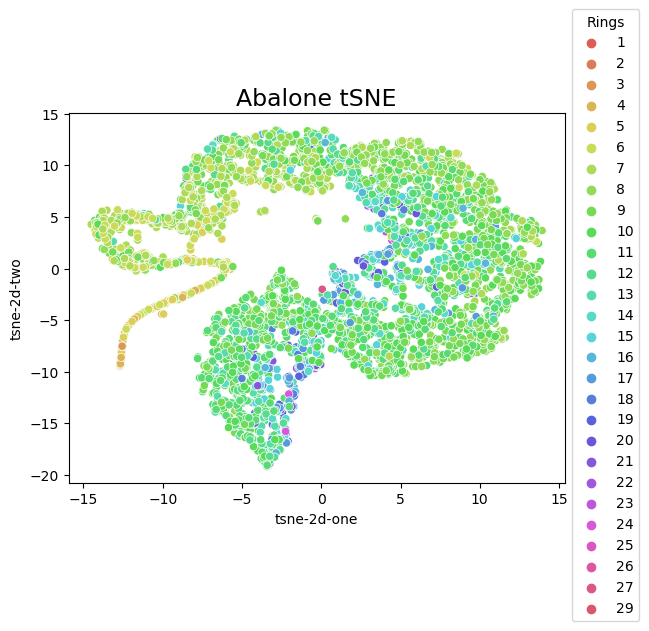

In [21]:
X_abalone_t = abalone_data.iloc[:, 1:-1]
y_abalone_t = abalone_data.iloc[:, -1]

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_abalone_t)
df_subset= pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure()
plt.title("Abalone tSNE", fontsize = 17)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y_abalone_t.tolist(),
    palette=sns.color_palette("hls", 28),
    data=df_subset,
    legend="full"
)

plt.legend(title = "Rings" ,loc = 2, bbox_to_anchor = (1,1.30))
plt.show()

As t-SNE maintains the manifold distance, the data in low dimension of t-SNE varies highly from that in PCA and LDA.

# Wine Data

Split the data into training and test sets and normalise the data

In [22]:
#Divding the data to X and y sets.
X_wine = wine_data.iloc[:, :-1]
y_wine = wine_data.iloc[:, -1]

X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=100)
X_w_train.iloc[:,:-1] = sc.fit_transform(X_w_train.iloc[:, :-1])
X_w_test.iloc[:,:-1] = sc.transform(X_w_test.iloc[:, :-1])

### KNN on Wine Raw

In [23]:
# Train the Model
classifier = KNeighborsClassifier(n_neighbors=46, weights="distance")
classifier.fit(X_w_train, y_w_train)
#Predict the model
y_w_pred = classifier.predict(X_w_test)
print("Accuracy : " + str(accuracy_score(y_w_test, y_w_pred)*100)+"%")
print("F1 Score : " + str(f1_score(y_w_pred, y_w_test, average = 'micro')*100)+"%")


Accuracy : 68.15384615384616%
F1 Score : 68.15384615384616%


After checking the best parameters for knn, k = 46 with weights = "distance" gives the best accuracy of 68.15%.

### Appplying PCA on Wine

In [25]:
#Diving the data into test and treaining sets
X_w_train_pca, X_w_test_pca, y_w_train_pca, y_w_test_pca = train_test_split(X_wine, y_wine, random_state= 45)

X_w_train_pca.iloc[:, :-1] = sc.fit_transform(X_w_train_pca.iloc[:, :-1])
X_w_test_pca.iloc[:, :-1] = sc.transform(X_w_test_pca.iloc[:, :-1])


pca = PCA(n_components=None)
X_w_train_pca = pca.fit_transform(X_w_train_pca)
X_w_test_pca = pca.transform(X_w_test_pca)


#Converting the object to dataframe
wine_pca = pd.DataFrame(data = X_w_train_pca)

For 95% explained variance, PCA gives 10 components.

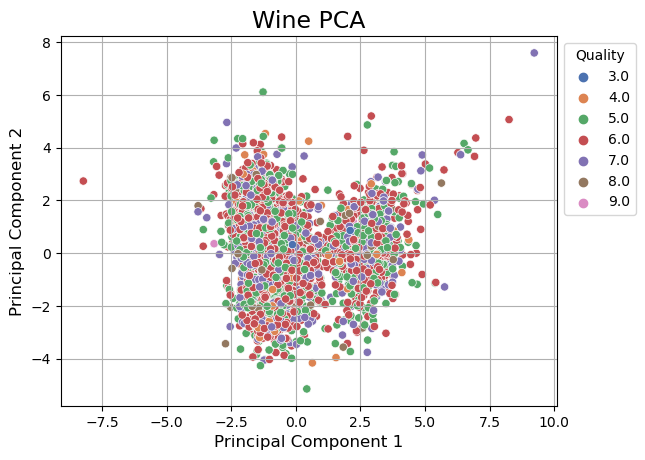

In [26]:
sns.scatterplot(wine_pca[0], wine_pca[1], hue = y_w_train_pca, palette= sns.color_palette("deep", 7))
plt.xlabel("Principal Component 1", fontsize = 12)
plt.ylabel("Principal Component 2", fontsize = 12)
plt.title("Wine PCA", fontsize = 17)
plt.legend(title = "Quality" ,loc = 2, bbox_to_anchor = (1,1))
plt.grid()
plt.show()

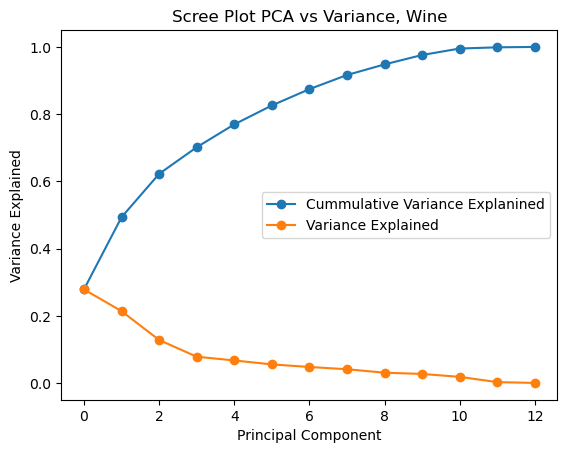

In [27]:
#Scree Plot
evr_abalone = nm.round(pca.explained_variance_ratio_,6)
cvr_abalone = nm.cumsum(pca.explained_variance_ratio_)
n_values = range(0, X_w_train_pca.shape[1])

pca_df_abalone = pd.DataFrame()
pca_df_abalone['Cummulative Variance Ratio'] = cvr_abalone
pca_df_abalone['Explained Variance Ratio'] = evr_abalone

plt.plot(n_values, pca_df_abalone,'o-')
plt.legend(['Cummulative Variance Explanined', 'Variance Explained'])
plt.title('Scree Plot PCA vs Variance, Wine')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

For 95% explained variance, PCA for Wine gives 10 components.

### Applying KNN on Wine PCA

In [28]:
number = (1,2,3,4,5,6,7,8,9,10,11,12,13)

columns = {
  "Accuracy": [],
  "PCA Components": []
}

#load data into a DataFrame object:
matrix = pd.DataFrame(columns)


for i in number:
    pca2 = PCA(n_components=i)
    X_w_train_pca = pca2.fit_transform(X_w_train_pca)
    X_w_test_pca = pca2.transform(X_w_test_pca)
    classifier = KNeighborsClassifier(n_neighbors=45, weights="distance")
    classifier.fit(X_w_train_pca, y_w_train_pca)
    y_w_pred_pca = classifier.predict(X_w_test_pca)
    matrix.loc[i-1] = [accuracy_score(y_w_test_pca, y_w_pred_pca), i]
    X_w_train_pca = X1_pca
    X_w_test_pca = X2_pca

Text(0, 0.5, 'Accuracy')

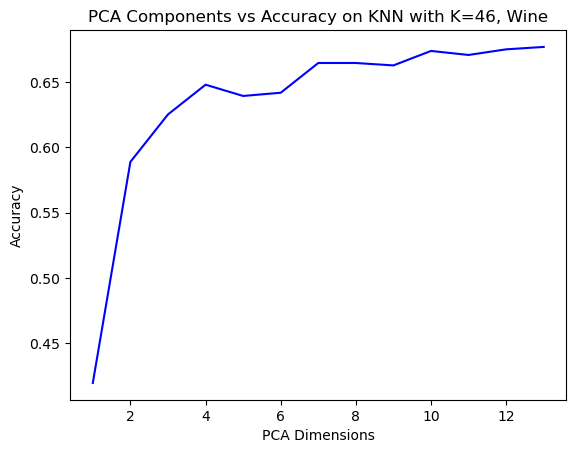

In [29]:
fig, ax = plt.subplots()
ax.plot( matrix['PCA Components'],matrix['Accuracy'], color='blue')
plt.title("PCA Components vs Accuracy on KNN with K=46, Wine")
plt.xlabel('PCA Dimensions')
plt.ylabel('Accuracy')

In [30]:
print(max(matrix['Accuracy']) *100)

print(nm.argmax(matrix['Accuracy']) + 1)

67.6923076923077
13


The Accuracy of KNN increases as the PCA components are increased. Overall, the best setting of KNN gives the best accuracy of 67.69% at 13 PCA components. However, at the 10 components PCA explaining 95% variance, accuracy is 67.38% which is just slightly less than 13 PCA. The accuracy of Wine PCA has decreased from Wine Raw.

### Applying LDA

In [41]:
#Diving the data into test and training sets
X_w_train_lda, X_w_test_lda, y_w_train_lda, y_w_test_lda = train_test_split(X_wine, y_wine, random_state= 45)

X1_lda = X_w_train_lda 
X2_lda = X_w_test_lda 

X_w_train_lda.iloc[:, :-1] = sc.fit_transform(X_w_train_lda.iloc[:, :-1])
X_w_test_lda.iloc[:, :-1] = sc.transform(X_w_test_lda.iloc[:, :-1])


In [45]:
lda = LDA(n_components=6)
X_w_train_lda = lda.fit_transform(X_w_train_lda, y_w_train_lda)
X_w_test_lda = lda.transform(X_w_test_lda)

wine_lda = pd.DataFrame(data = X_w_train_lda)

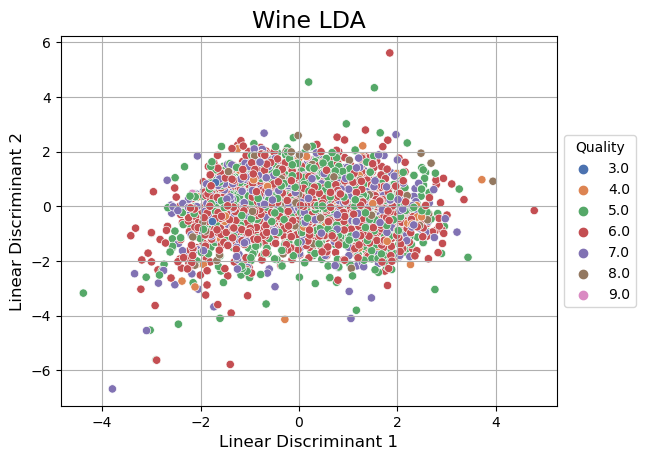

In [46]:
sns.scatterplot(wine_lda[0], wine_lda[1], hue = y_w_train_lda, legend = "full", palette= sns.color_palette("deep", 7))
plt.xlabel("Linear Discriminant 1", fontsize = 12)
plt.ylabel("Linear Discriminant 2", fontsize = 12)
plt.title("Wine LDA", fontsize = 17)
plt.legend(title = "Quality" ,loc = 2, bbox_to_anchor = (1,0.75))
plt.grid()
plt.show()


### Applying KNN on Wine LDA

In [47]:
number = (1,2,3,4,5)

columns = {
  "Accuracy": [],
  "LDA Components": []
}

#load data into a DataFrame object:
matrix = pd.DataFrame(columns)


for i in number:
    lda2 = LDA(n_components=i)
    X_w_train_lda = lda2.fit_transform(X_w_train_lda, y_w_train_lda)
    X_w_test_lda = lda2.transform(X_w_test_lda)
    classifier = KNeighborsClassifier(n_neighbors=46, weights="distance")
    classifier.fit(X_w_train_lda, y_w_train_lda)
    y_w_pred_lda = classifier.predict(X_w_test_lda)
    matrix.loc[i-1] = [accuracy_score(y_w_test_lda, y_w_pred_lda), i]
    X_w_train_lda = X1_lda
    X_w_test_lda = X2_lda

Text(0, 0.5, 'Accuracy')

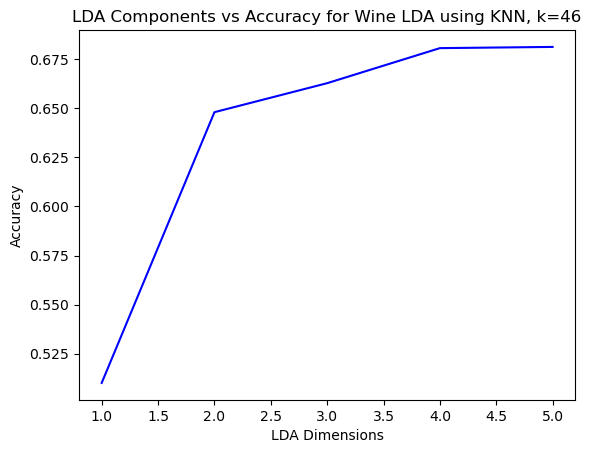

In [48]:
fig, ax = plt.subplots()
ax.plot( matrix['LDA Components'],matrix['Accuracy'], color='blue')
plt.title("LDA Components vs Accuracy for Wine LDA using KNN, k=46")
plt.xlabel('LDA Dimensions')
plt.ylabel('Accuracy')

In [49]:
print(max(matrix['Accuracy']) *100)

print(nm.argmax(matrix['Accuracy']) + 1)

68.12307692307692
5


The maximum accuracy is 68.12% at 5 LDA. Which is almost the same as the Wine Raw.

# TSNE on Wine 

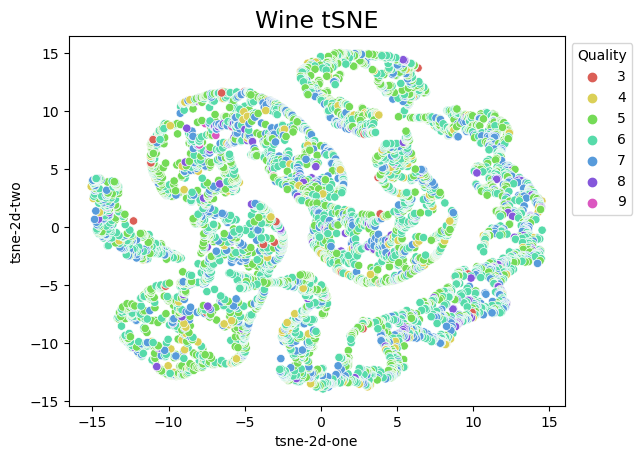

In [36]:
X_wine_t = wine_data.iloc[:, :-1]
y_wine_t = wine_data.iloc[:, -1]

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_wine_t)
df_subset= pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure()
plt.title("Wine tSNE", fontsize = 17)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y_wine_t.tolist(),
    palette=sns.color_palette("hls", 7),
    data=df_subset,
    legend="full"
)

plt.legend(title = "Quality", loc = 2, bbox_to_anchor = (1,1))
plt.show()

As t-SNE maintains the manifold distance, the data in low dimension of t-SNE varies highly from that in PCA and LDA.